In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [2]:
# Load and preprocess the dataset
df = pd.read_csv("UkElectricity_2023.csv", parse_dates=['datetime'])

In [3]:
missing_values = df.isnull().sum()
missing_values

,0
datetime,0
Price,0
Volume,0
Settlement Period,0
hour,0
quarter,0
year,0
dayofyear,0
dayofmonth,0
weekofyear,0


In [4]:
X = df.drop(columns=["Price", "datetime"])
y = df["Price"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
### 1. XGBoost Regressor
xgb_model = XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)



In [6]:
# Performance Metrics for XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mape_xgb = np.mean(np.abs((y_test - y_pred_xgb) / y_test)) * 100
r2_xgb = r2_score(y_test, y_pred_xgb)

In [7]:
#Print Metrics
print("XGBoost:")
print(f"MSE: {mse_xgb:.2f}, MAE: {mae_xgb:.2f}, RMSE: {rmse_xgb:.2f}, MAPE: {mape_xgb:.2f}%, R2: {r2_xgb:.2f}")


XGBoost:
MSE: 22.10, MAE: 3.39, RMSE: 4.70, MAPE: 8.11%, R2: 0.89


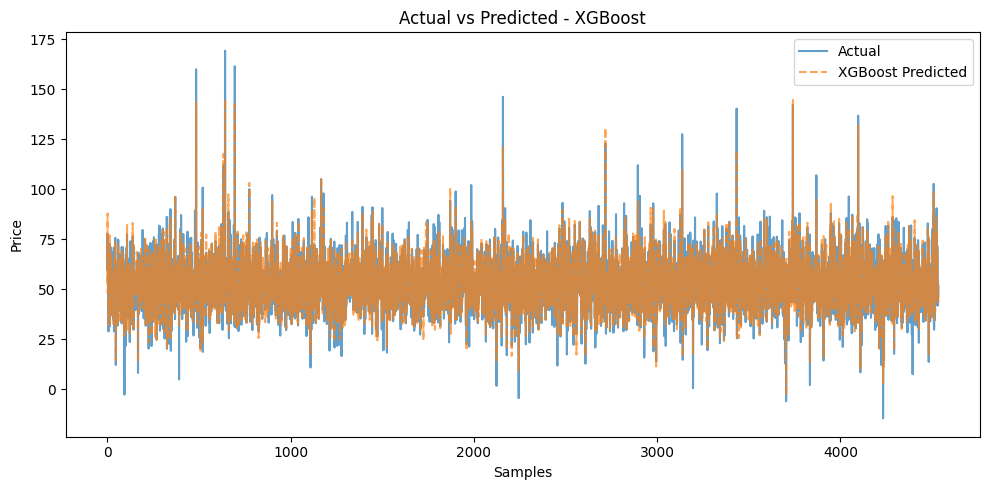

In [8]:
#Actual vs Predicted for XGBoost
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual", alpha=0.7)
plt.plot(y_pred_xgb, label="XGBoost Predicted", linestyle="--", alpha=0.7)
plt.title("Actual vs Predicted - XGBoost")
plt.xlabel("Samples")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()





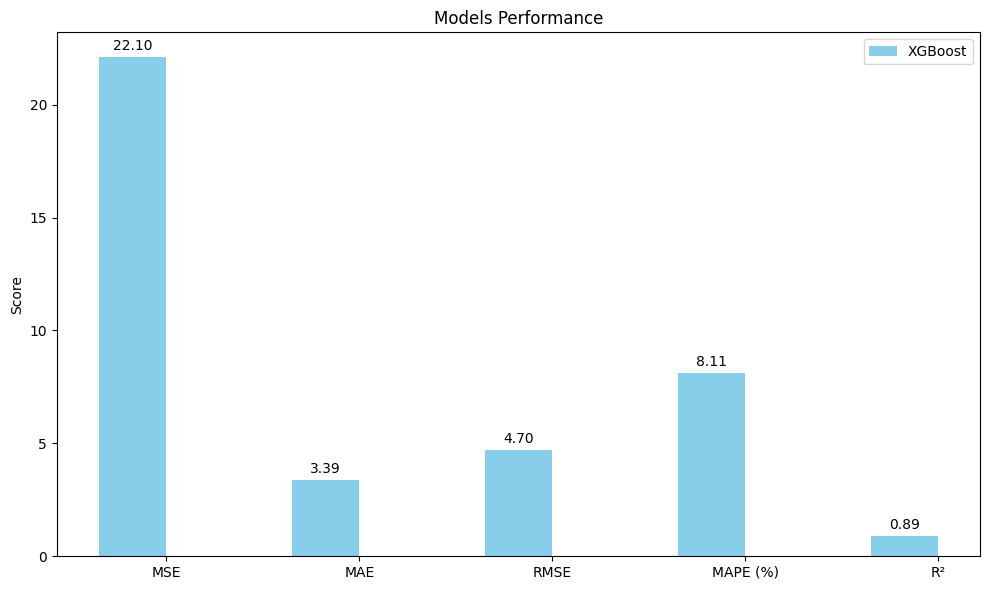

In [9]:
# Performance metrics
metrics = ['MSE', 'MAE', 'RMSE', 'MAPE (%)', 'R²']
xgb_values = [22.10, 3.39, 4.70, 8.11, 0.89]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # width of bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, xgb_values, width, label='XGBoost', color='skyblue')
# Labels, title, and legend
ax.set_ylabel('Score')
ax.set_title('Models Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Annotate values
for bars in [bars1]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()
